<div style="font-size:1.5em">
    <p>📜 Table des matières:</p>
    <ul>
       <li><a href="#libr">Importation des librairies nécéssaires</a></li>  
       <li>
          <a href="#data_prep">Préparation des données📊</a>
       </li>
       <li>
          <a href="#PCA">Analyse en composantes principales 📈</a>
          <ul>
          </ul>
       </li>
    </ul>
</div>

<h1 id="libr">Importation des librairies nécéssaires📚:</h1>

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [53]:
import pandas as pd

<h1 id = "data_prep">Préparation des données📊</h1>

importation des données:

In [54]:
df = pd.read_csv("C:/Users/PC2/Downloads/tmaroc.csv")

Rendre le tableau des données en format acceptable pour l'analyse:

In [55]:
df.fillna('cities',inplace=True)
df.columns = df.iloc[0] 
df
df.drop(df.index[0],inplace=True)
df

,cities,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre
1,CASA,12.1,12.8,14.9,16.5,19.2,21.8,23.3,24,22.3,20.2,15.8,13.4
2,Rabat,12.2,12.8,14.9,16.4,19.1,21.9,23.5,24.2,22.6,20.3,16,13.5
3,Oujda,8.4,9.4,12.2,14.6,18,22.5,26,26.1,21.9,18.4,12.3,9.4
4,Marrakech,9.7,11.3,14.6,17.1,20.4,24.4,27.5,27.6,23.6,20.1,14.2,11
5,LAAYOUNE,16.1,16.6,18.3,19.0,20.2,21.6,23.0,24.1,23.4,22.3,19.5,17.4
6,Ifrane,3.5,4.5,7.4,10,13.6,18.3,22.2,22,17.5,13.5,7.6,5.1
7,Kelaat Magouna,6.0,7.5,11.4,15.5,19.4,24.2,27.4,26.1,21.5,16.3,10.2,6.8
8,Errachidia,8.3,10.4,14.7,19.0,23.0,28.0,31.7,30.6,25.6,20.1,13.1,9.2
9,Agadir,13.7,14.7,17.0,18.4,20.6,23.0,26.1,26.4,23.4,21.5,17.5,14.9
10,Essaouira,14.2,14.7,16.4,17.3,19.0,21.0,22.8,23.4,21.9,20.5,17.3,15.5


Suppression de la ville de Ifrane:

In [56]:
df.drop(df.index[5],inplace=True)
df["cities"]


1               CASA
2              Rabat
3              Oujda
4          Marrakech
5           LAAYOUNE
7     Kelaat Magouna
8         Errachidia
9             Agadir
10         Essaouira
11            Tanger
12              Safi
13       Beni mellal
14         El jadida
15        Al Hoceima
Name: cities, dtype: object

Conversion des données en format numériques pour pouvoir appliquer l'ACP:

In [57]:
df = df[['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin',
       'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']].apply(pd.to_numeric)

In [58]:
df["mean"]=df.mean(axis=1)
df["mean winter"]=df[['Janvier', 'Février', 'Septembre', 'Octobre', 'Novembre', 'Décembre']].mean(axis=1)
df["mean winter"].describe()
df["mean summer"]=df[["Mars","Avril","Mai","Juin","Juillet",'Août']].mean(axis=1)
df["mean summer"].describe()



count    14.000000
mean     20.701190
std       1.361913
min      19.450000
25%      19.912500
50%      19.991667
75%      21.108333
max      24.500000
Name: mean summer, dtype: float64

In [59]:
df.index=["CASA", "Rabat", "Oujda", "Marrakech", "LAAYOUNE", "Kelaat Magouna", "Errachidia", "Agadir" ,"Essaouira", "Tanger", "Safi", "Beni mellal", "El jadida", "Al Hoceima"]
df

,Janvier,Février,Mars,Avril,Mai,Juin,Juillet,Août,Septembre,Octobre,Novembre,Décembre,mean,mean winter,mean summer
CASA,12.1,12.8,14.9,16.5,19.2,21.8,23.3,24.0,22.3,20.2,15.8,13.4,18.025000,16.100000,19.950000
Rabat,12.2,12.8,14.9,16.4,19.1,21.9,23.5,24.2,22.6,20.3,16.0,13.5,18.116667,16.233333,20.000000
Oujda,8.4,9.4,12.2,14.6,18.0,22.5,26.0,26.1,21.9,18.4,12.3,9.4,16.600000,13.300000,19.900000
Marrakech,9.7,11.3,14.6,17.1,20.4,24.4,27.5,27.6,23.6,20.1,14.2,11.0,18.458333,14.983333,21.933333
LAAYOUNE,16.1,16.6,18.3,19.0,20.2,21.6,23.0,24.1,23.4,22.3,19.5,17.4,20.125000,19.216667,21.033333
Kelaat Magouna,6.0,7.5,11.4,15.5,19.4,24.2,27.4,26.1,21.5,16.3,10.2,6.8,16.025000,11.383333,20.666667
Errachidia,8.3,10.4,14.7,19.0,23.0,28.0,31.7,30.6,25.6,20.1,13.1,9.2,19.475000,14.450000,24.500000
Agadir,13.7,14.7,17.0,18.4,20.6,23.0,26.1,26.4,23.4,21.5,17.5,14.9,19.766667,17.616667,21.916667
Essaouira,14.2,14.7,16.4,17.3,19.0,21.0,22.8,23.4,21.9,20.5,17.3,15.5,18.666667,17.350000,19.983333
Tanger,11.8,12.1,13.7,15.4,18.1,21.5,23.7,24.3,22.1,19.2,15.0,12.9,17.483333,15.516667,19.450000


In [60]:
df["mean"].describe()

count    14.000000
mean     18.185119
std       1.147061
min      16.025000
25%      17.535417
50%      18.254167
75%      18.618750
max      20.125000
Name: mean, dtype: float64

<h1 id ="PCA">Analyse en composantes principales📈:</h1>

In [61]:
def coloring(columnname,t1,t2):
    colors = []
    for index ,row in df.iterrows():
        if row[columnname] <t1 :
            colors.append("Blue")
        elif t1<row[columnname]<t2 : 
            colors.append("Yellow")
        else:
            colors.append("Red")
    return colors

#colors=coloring("mean winter",14,16)
colors=coloring("mean",17,18)



In [62]:
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
pca = PCA(n_components=2)
df_new = pca.fit_transform(df)
df_new

array([[-0.9511284 , -1.07119862],
       [-0.99554714, -0.88783491],
       [ 3.3433988 , -2.30617646],
       [ 1.3958725 ,  2.04928728],
       [-5.23067267,  1.79143431],
       [ 5.80492821, -1.64910137],
       [ 3.03036111,  6.69410713],
       [-2.51168378,  2.59654101],
       [-2.91164213, -0.98682937],
       [ 0.11621221, -2.28980383],
       [-2.06501858, -0.94625265],
       [ 3.67793103,  0.14651432],
       [-2.3731054 , -0.97417017],
       [-0.32990577, -2.16651664]])

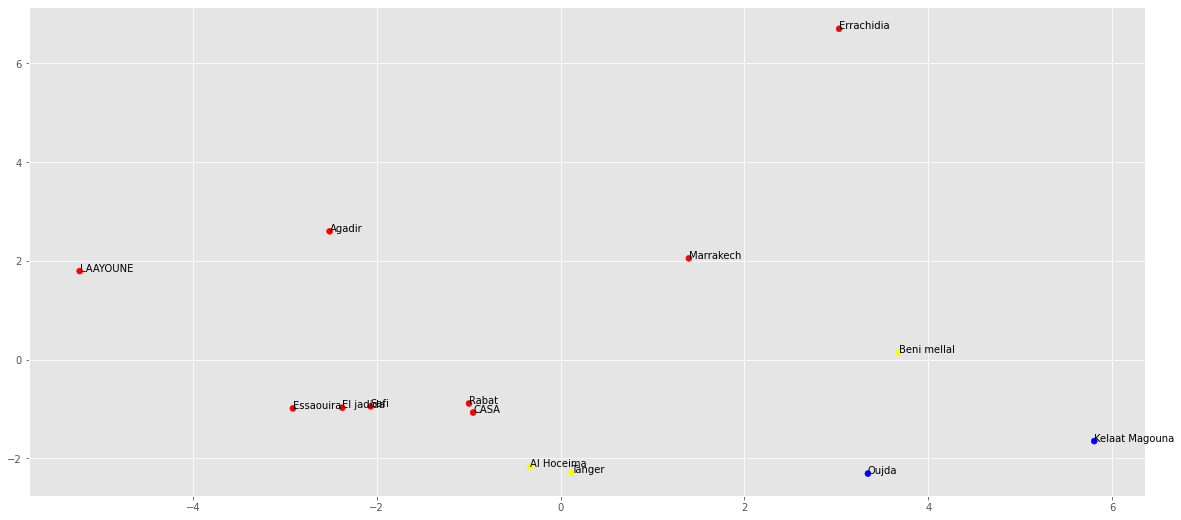

In [63]:
subtitles_list = ["CASA", "Rabat", "Oujda", "Marrakech", "LAAYOUNE", "Kelaat Magouna", "Errachidia", "Agadir" ,"Essaouira", "Tanger", "Safi", "Beni mellal", "El jadida", "Al Hoceima"]
fig, ax = plt.subplots(figsize=(20,9))
ax.scatter( df_new[:,0], df_new[:,1] ,color=colors)
for i, txt in enumerate(subtitles_list ):
    ax.annotate(txt, (df_new[:,0][i], df_new[:,1][i]))

Le pourcentage de chaque axe:

In [64]:
pca.explained_variance_ratio_


array([0.58854485, 0.38910624])

à peu près 3% de l'information est perdu